In [1]:
from experiments.cube.Cube import Cube
from hdimvis.metrics.stress.stress import vectorised_stress, unvectorised_stress
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import euclidean
from sklearn.decomposition import PCA
from hdimvis.algorithms.stochastic_ntet_algo.SNeD import SNeD
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.visualise_layouts_and_metrics.plot import show_layout, show_generation_metrics
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import manhattan
import numpy as np
import matplotlib.pyplot as plt
import os
import definitions
from time import perf_counter
import pathlib
from pathlib import Path
import pickle

In [2]:
avg_grads = []

dataset = DataFetcher.fetch_data('rna N3k')
Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
Xld *= 10/np.std(Xld)
random_initial =  10*np.random.randn(dataset.data.shape[0], 2)



####################
Fetching the "rna N3k" dataset
####################
Dataset loaded
Dataset shape: (3000, 50)
####################


In [3]:
for ntet in [4,8,12]:
    squad = SNeD(dataset=dataset, initial_layout=Xld, use_nesterovs_momentum=False, ntet_size=ntet, use_relative_dist=True)
    layout = LayoutCreation.create_layout(squad, no_iters=100, use_decay=False, record_avg_grad=True)
    avg_grads.append(layout.avg_grads)
print(avg_grads)

####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 4
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
####################
A 2D layout of the "rna N3k" dataset will be created 
using the "Stochastic N-tet Descent MDS" algorithm
####################
The HD distance measure used is: euclidean
####################
 "N-tet" size: 8
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
###################

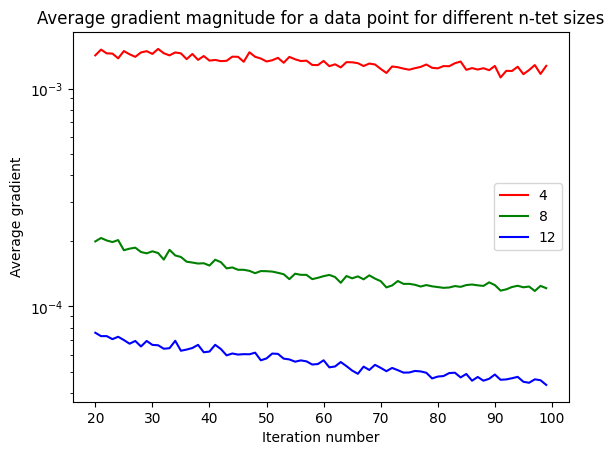

In [11]:
fig, ax = plt.subplots()

ax.plot(np.arange(20,100), avg_grads[0][20:], c='r', label="4")
ax.plot(np.arange(20,100), avg_grads[1][20:], c='g', label="8")
ax.plot(np.arange(20,100), avg_grads[2][20:], c='b', label="12")
plt.yscale('log')
ax.set_title('Average gradient magnitude for a data point for different n-tet sizes')
ax.set_ylabel('Average gradient')
ax.set_xlabel('Iteration number')
plt.legend()